<a href="https://colab.research.google.com/github/megantoops/demo/blob/main/ICP_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 446s 283ms/step - accuracy: 0.2014 - loss: 2.0825 - val_accuracy: 0.4739 - val_loss: 1.4239
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 504s 285ms/step - accuracy: 0.4653 - loss: 1.4554 - val_accuracy: 0.5468 - val_loss: 1.2442
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 448s 287ms/step - accuracy: 0.5480 - loss: 1.2495 - val_accuracy: 0.5906 - val_loss: 1.1213
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 286ms/step - accuracy: 0.5979 - loss: 1.1221 - val_accuracy: 0.6384 - val_loss: 1.0008
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 497s 283ms/step - accuracy: 0.6301 - loss: 1.0355 - val_accuracy: 0.6507 - val_loss: 0.9744
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 283ms/step - accuracy: 0.6548 - loss: 0.9748 - val_accuracy: 0.6547 - val_loss: 0.9814
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 517s 293ms/step - accuracy: 0.6698 - loss: 0.9261 - val_accuracy: 0.6995 - val_loss: 0.8624
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 483s 280ms/step - ac

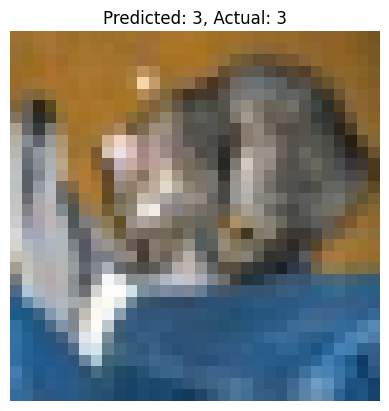

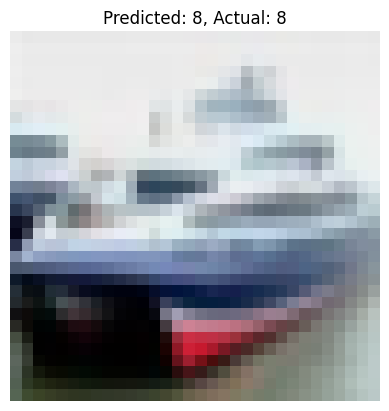

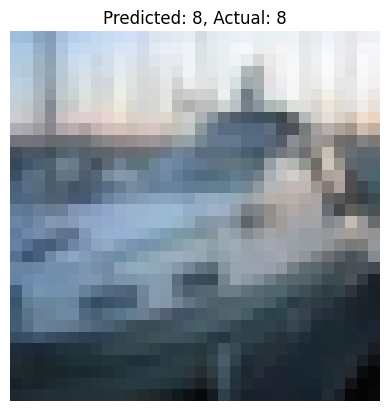

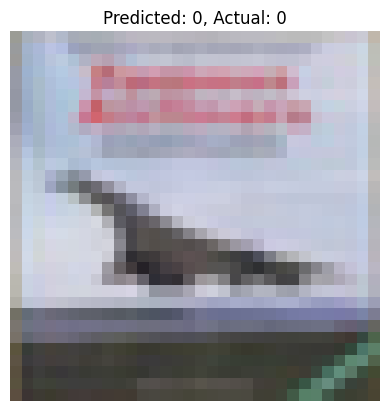

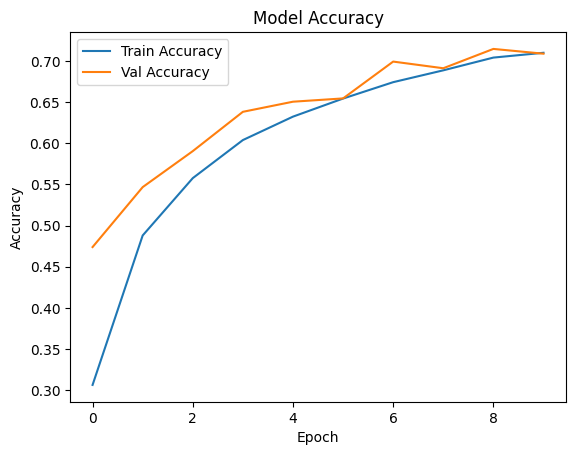

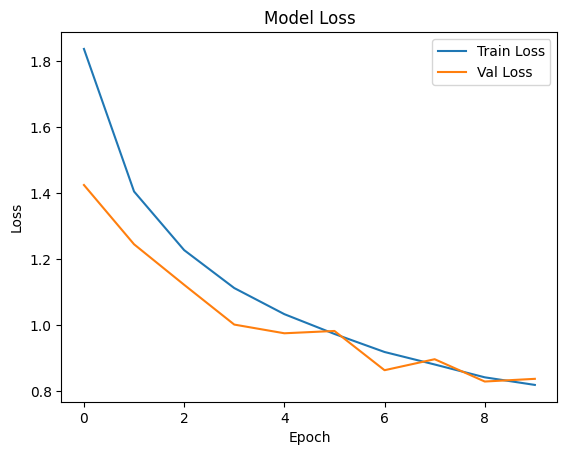

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Step 2: Build CNN Model (with padding='same')
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

# Step 3: Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train model
history = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_test, y_test_cat))

# Step 5: Evaluate performance
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 6: Predict first 4 images
predictions = model.predict(x_test[:4])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = y_test[:4].flatten()

for i in range(4):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")
    plt.axis('off')
    plt.show()

# Step 7: Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
